# Worksheet 04a: Tidy Data & The Model-Fitting Paradigm in R
_**Leader**: Diana Lin_
_**Reviewer:** Icíar Fernández Boyano_
_**ASDA Assist:** David Kepplinger_

**Version 1.3** - Delivered Thursday, Oct. 8, 2020

Fixes (v1.3):
- _Question 2.4_: clarified question to be looking at `attendance`
- _Question 2.5_: clarified question to be looking at `wedding_attendance`; removed `.groups`

Fixes (v1.2):
- _Question 1.1-2.3_: Added "after" tibbles so students can visualize what they're trying to achieve

Fixes (v1.1):
- _Question 1.2_: clarified hint; missing last line in `FILL_THIS_IN` answer:
```
(answer1.2 <- answer1.1 %>% 
  FILL_THIS_IN(cols = c(-FILL_THIS_IN, -FILL_THIS_IN), 
               names_to  = FILL_THIS_IN, 
               values_to = FILL_THIS_IN))
```   
- _Question 2.1_: added a hint
- _Question 2.4_: removed `.groups` as it was confusing the students

This is the corresponding worksheet for Class 8 (Oct 6, 2020) & Class 9 (Oct 8, 2020). As discussed in class, you will need to correctly complete at least 5 questions for full marks.

Remember to pay attention to the variable name to store your answer in, or else it will not be autograded correctly. To ensure everything works properly, remember to run _all_ code cells, not just the ones with your answer.

If there are packages used that are not yet installed, you can use the code cell below to install them. _You may not need to use this code cell at all._

In [2]:
# Install additional packages, e.g.,
# install.packages("gapminder")
# install.packages("tidyverse")
# install.packages("broom")

Use the following code cell to load any additional packages you want to use for this worksheet. _You may not need to use this code cell at all._

In [3]:
# Load additional packages, e.g.,
# suppressPackageStartupMessages(library(broom))

For marking purposes, we will need the packages below. Run the code cell to load them.

In [4]:
library(testthat)
library(digest)

## TOPIC 1: Tidy Data

To do our pivoting, we will be using the `tidyverse` package and the following datasets. `broom` will be used later for model-fitting. Run the code cell below.

In [5]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(gapminder))
lotr  <- suppressMessages(read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/lotr_tidy.csv"))
guest <- suppressMessages(read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/wedding/attend.csv"))

## Question 1: Univariate Pivoting

Consider the Lord of the Rings data. Run the code cell below to see the data frame.

In [6]:
lotr

Film,Race,Gender,Words
<chr>,<chr>,<chr>,<dbl>
The Fellowship Of The Ring,Elf,Female,1229
The Fellowship Of The Ring,Hobbit,Female,14
The Fellowship Of The Ring,Man,Female,0
The Two Towers,Elf,Female,331
The Two Towers,Hobbit,Female,0
The Two Towers,Man,Female,401
The Return Of The King,Elf,Female,183
The Return Of The King,Hobbit,Female,2
The Return Of The King,Man,Female,268


### Question 1.1
Widen the data so that we see the words spoken by each race, by puttting race as its own column. Store the answer in `answer1.1`.

```
(answer1.1 <- lotr %>%
    FILL_THIS_IN(id_cols = c(-FILL_THIS_IN, -FILL_THIS_IN), 
                names_from = FILL_THIS_IN,
                values_from = FILL_THIS_IN))
```

Your `answer1.1` should look something like this (full tibble not always shown):

![answer1.1](https://github.com/UBC-STAT/stat545.stat.ubc.ca/raw/master/content/data/worksheet_04a/answer1.1.png)

_Sidenote:_ Putting a variable assignment in parenthesis will not only assign the value to the variable, but also print to console. Normally when you assign a variable, you do not get to see the value of the variable. This is a helpful tip so you can see what you are storing! Run the two cells below for an example.

In [7]:
# WITHOUT PARENTHESES
x <- 2 + 2

In [8]:
# WITH PARENTHESES
(x <- 2 + 2)

[1] 4

In [10]:
### BEGIN SOLUTION
(answer1.1 <- lotr %>%
    pivot_wider(id_cols = c(-Race, -Words), 
                names_from = Race,
                values_from = Words))
### END SOLUTION

Film,Gender,Elf,Hobbit,Man
<chr>,<chr>,<dbl>,<dbl>,<dbl>
The Fellowship Of The Ring,Female,1229,14,0
The Two Towers,Female,331,0,401
The Return Of The King,Female,183,2,268
The Fellowship Of The Ring,Male,971,3644,1995
The Two Towers,Male,513,2463,3589
The Return Of The King,Male,510,2673,2459


In [9]:
test_that("Question 1.1", {expect_equal(digest(unclass(answer1.1)), "46ea73256bb64844b42355b8260fe822")})
print("Success!")

[1] "Success!"


### Question 1.2
Re-lengthen the wide `lotr` data (i.e. `answer1.1`) from Question 1.1 above. Store your answer in `answer1.2`.

**Hint:** the resulting data frame should appear to be the _almost the same_ as the original! (No need to reorder the columns)

```
(answer1.2 <- answer1.1 %>% 
  FILL_THIS_IN(cols = c(-FILL_THIS_IN, -FILL_THIS_IN), 
               names_to  = FILL_THIS_IN, 
               values_to = FILL_THIS_IN))
```

Your `answer1.2` should look something like this (full tibble not always shown):

![answer1.2](https://github.com/UBC-STAT/stat545.stat.ubc.ca/raw/master/content/data/worksheet_04a/answer1.2.png)

In [10]:
### BEGIN SOLUTION
(answer1.2 <- answer1.1 %>% 
  pivot_longer(cols = c(-Film, -Gender), 
               names_to  = "Race", 
               values_to = "Words"))
### END SOLUTION

Film,Gender,Race,Words
<chr>,<chr>,<chr>,<dbl>
The Fellowship Of The Ring,Female,Elf,1229
The Fellowship Of The Ring,Female,Hobbit,14
The Fellowship Of The Ring,Female,Man,0
The Two Towers,Female,Elf,331
The Two Towers,Female,Hobbit,0
The Two Towers,Female,Man,401
The Return Of The King,Female,Elf,183
The Return Of The King,Female,Hobbit,2
The Return Of The King,Female,Man,268


In [11]:
test_that("Question 1.2", {expect_equal(digest(unclass(answer1.2)), "390a16fa66d2f2a3e19f1b5a489c6d4d")})
print("Success!")

[1] "Success!"


## Question 2: Multivariate Pivoting
Congratulations, you’re getting married! In addition to the wedding, you’ve decided to hold two other events: a day-of brunch and a day-before round of golf. You’ve made a guestlist of attendance so far, along with food preference for the food events (wedding and brunch).

Run the code cell below to see the `guest` data frame.

In [12]:
guest

party,name,meal_wedding,meal_brunch,attendance_wedding,attendance_brunch,attendance_golf
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,PENDING,PENDING,PENDING,PENDING,PENDING
1,Phillip Medrano,vegetarian,Menu C,CONFIRMED,CONFIRMED,CONFIRMED
1,Blanka Medrano,chicken,Menu A,CONFIRMED,CONFIRMED,CONFIRMED
1,Emaan Medrano,PENDING,PENDING,PENDING,PENDING,PENDING
2,Blair Park,chicken,Menu C,CONFIRMED,CONFIRMED,CONFIRMED
2,Nigel Webb,NA,NA,CANCELLED,CANCELLED,CANCELLED
3,Sinead English,PENDING,PENDING,PENDING,PENDING,PENDING
4,Ayra Marks,vegetarian,Menu B,PENDING,PENDING,PENDING
5,Atlanta Connolly,PENDING,PENDING,PENDING,PENDING,PENDING


### Question 2.1
Put `meal` and `attendance` as their own columns, with the events living in a new column. Store your answer in `answer2.1`.

```
(answer2.1 <- guest %>% 
  FILL_THIS_IN(cols      = c(-FILL_THIS_IN, -FILL_THIS_IN), 
               names_to  = c(FILL_THIS_IN, FILL_THIS_IN),
               names_sep = FILL_THIS_IN))
```               

**Hint**: Read the possible values for `names_to` in the corresponding documentation of the function you choose!

Your `answer2.1` should look something like this (full tibble not always shown):

![answer2.1](https://github.com/UBC-STAT/stat545.stat.ubc.ca/raw/master/content/data/worksheet_04a/answer2.1.png)

In [11]:
### BEGIN SOLUTION
(answer2.1 <- guest %>% 
  pivot_longer(cols      = c(-party, -name), 
               names_to  = c(".value", "event"),
               names_sep = "_"))
### END SOLUTION

party,name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,wedding,PENDING,PENDING
1,Sommer Medrano,brunch,PENDING,PENDING
1,Sommer Medrano,golf,NA,PENDING
1,Phillip Medrano,wedding,vegetarian,CONFIRMED
1,Phillip Medrano,brunch,Menu C,CONFIRMED
1,Phillip Medrano,golf,NA,CONFIRMED
1,Blanka Medrano,wedding,chicken,CONFIRMED
1,Blanka Medrano,brunch,Menu A,CONFIRMED
1,Blanka Medrano,golf,NA,CONFIRMED


In [14]:
test_that("Question 2.1", {expect_equal(digest(unclass(answer2.1)), "fe0a2bfdbbf30dafc1a89a59c536c466")})
print("Success!")

[1] "Success!"


### Question 2.2
Use `tidyr::separate()` to split the `name` in `answer2.1` into two columns: `first_name` and `last_name`. Store your answer in `answer2.2`.

```
(answer2.2 <- answer2.1 %>% 
  FILL_THIS_IN(FILL_THIS_IN, into = c(FILL_THIS_IN, FILL_THIS_IN), sep=FILL_THIS_IN))
```  

Your `answer2.2` should look something like this (full tibble not always shown):

![answer2.2](https://github.com/UBC-STAT/stat545.stat.ubc.ca/raw/master/content/data/worksheet_04a/answer2.2.png)

In [15]:
### BEGIN SOLUTION
(answer2.2 <- answer2.1 %>% 
  separate(name, into = c("first_name", "last_name"), sep=" "))
### END SOLUTION

party,first_name,last_name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sommer,Medrano,wedding,PENDING,PENDING
1,Sommer,Medrano,brunch,PENDING,PENDING
1,Sommer,Medrano,golf,NA,PENDING
1,Phillip,Medrano,wedding,vegetarian,CONFIRMED
1,Phillip,Medrano,brunch,Menu C,CONFIRMED
1,Phillip,Medrano,golf,NA,CONFIRMED
1,Blanka,Medrano,wedding,chicken,CONFIRMED
1,Blanka,Medrano,brunch,Menu A,CONFIRMED
1,Blanka,Medrano,golf,NA,CONFIRMED


In [16]:
test_that("Question 2.2", {expect_equal(digest(unclass(answer2.2)), "9a7434fe2e4446e405fec4200cb8580b")})
print("Success!")

[1] "Success!"


### Question 2.3
Re-unite `first_name` and `last_name` in `answer2.2` back into `name` using `tidyr::unite()`. Store your answer in `answer2.3`.

```
(answer2.3 <- answer2.2 %>%
    FILL_THIS_IN(col = FILL_THIS_IN, c(FILL_THIS_IN, FILL_THIS_IN), sep = FILL_THIS_IN))
```    

Your `answer2.3` should look something like this (full tibble not always shown):

![answer2.3](https://github.com/UBC-STAT/stat545.stat.ubc.ca/raw/master/content/data/worksheet_04a/answer2.3.png)

In [17]:
### BEGIN SOLUTION
(answer2.3 <- answer2.2 %>%
    unite(col = "name", c("first_name", "last_name"), sep = " "))
### END SOLUTION

party,name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,wedding,PENDING,PENDING
1,Sommer Medrano,brunch,PENDING,PENDING
1,Sommer Medrano,golf,NA,PENDING
1,Phillip Medrano,wedding,vegetarian,CONFIRMED
1,Phillip Medrano,brunch,Menu C,CONFIRMED
1,Phillip Medrano,golf,NA,CONFIRMED
1,Blanka Medrano,wedding,chicken,CONFIRMED
1,Blanka Medrano,brunch,Menu A,CONFIRMED
1,Blanka Medrano,golf,NA,CONFIRMED


In [18]:
test_that("Question 2.3", {expect_equal(digest(unclass(answer2.3)), "fe0a2bfdbbf30dafc1a89a59c536c466")})
print("Success!")

[1] "Success!"


### Question 2.4
Which parties still have a "PENDING" status for all members and all event _attendance_? Store your answer in `answer2.4`.

**Hint**: use `answer2.1` as a starting point. Use `pull()` to access the `party` column as a vector.

```
(answer2.4 <- answer2.1 %>% 
    group_by(FILL_THIS_IN) %>% 
    summarize(all_pending = all(FILL_THIS_IN == "PENDING")) %>%
    filter(all_pending == FILL_THIS_IN) %>%
    FILL_THIS_IN(party))
```    

In [27]:
### BEGIN SOLUTION
(answer2.4 <- answer2.1 %>% 
    group_by(party) %>% 
    summarize(all_pending = all(attendance == "PENDING")) %>%
    filter(all_pending == TRUE) %>%
    pull(party))
### END SOLUTION

`summarise()` ungrouping output (override with `.groups` argument)



[1]  3  4  8 10

In [28]:
test_that("Question 2.4", {expect_equal(digest(unclass(answer2.4)),"f13a65bc5c8793a2cad1415aad7dff93")})
print("Success!")

[1] "Success!"


### Question 2.5
Which parties still have a “PENDING” status for for all members for wedding _attendance_? Store your answer in `answer2.5`.

**Hint**: Use `pull()` to access the `party` column as a vector.

```
(answer2.5 <- guest %>% 
    group_by(FILL_THIS_IN) %>% 
    summarize(pending_wedding = all(FILL_THIS_IN == "PENDING")) %>%
    filter(FILL_THIS_IN == TRUE) %>%
    FILL_THIS_IN(party))
```    

In [30]:
### BEGIN SOLUTION
(answer2.5 <- guest %>% 
    group_by(party) %>% 
    summarize(pending_wedding = all(attendance_wedding == "PENDING")) %>%
    filter(pending_wedding == TRUE) %>%
    pull(party))
### END SOLUTION

[1]  3  4  8 10

In [31]:
test_that("Question 2.5", {expect_equal(digest(unclass(answer2.5)), "f13a65bc5c8793a2cad1415aad7dff93")})
print("Success!")

[1] "Success!"


### TOPIC 2: The Model-Fitting Paradigm in R¶
So you want to fit a model to your data. How can you achieve this with R?

Topics:

1. What _is_ model-fitting?
2. How do we fit a model in R?
3. How can we obtain tidy results from the model output?

### What is Model-Fitting?
When variables are not independent, then we can gain information about one variable if we know something about the other.

Examples: Use the scatterplot below:

1. A car weighs 4000 lbs. What can we say about its mpg?
2. A car weights less than 3000 lbs. What can we say about its mpg?

Run the code cell below to see the `mtcars` plot.

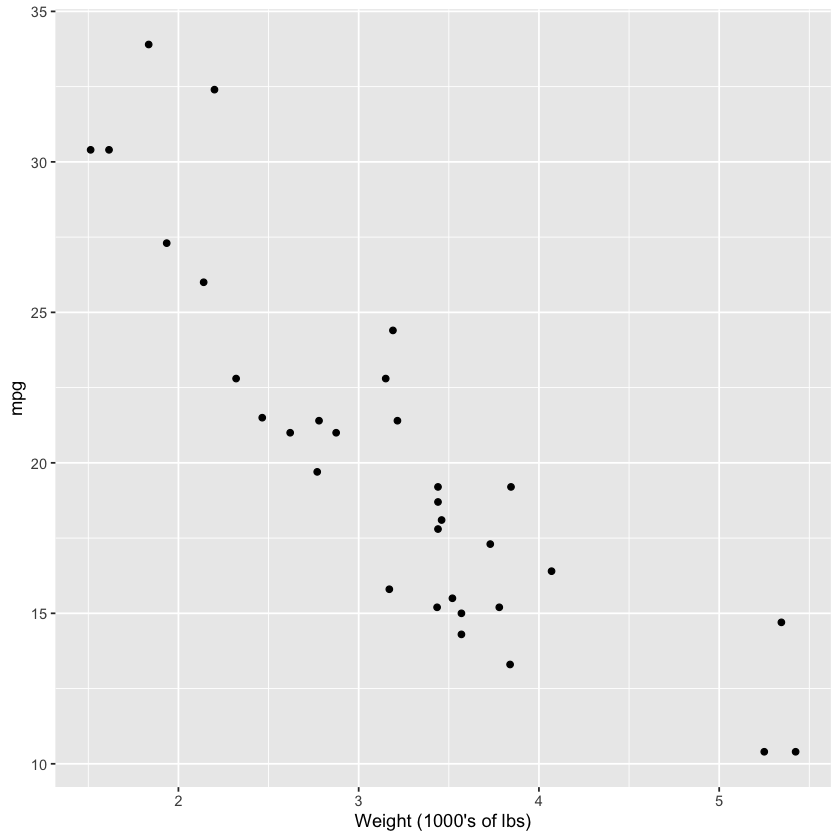

In [32]:
# models can fit many data points (using an 'averaged' data line is not always helpful)
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  labs(x = "Weight (1000's of lbs)")

Example: What can we say about rear axle ratio if we know something about quarter mile time? Run the code cell below!

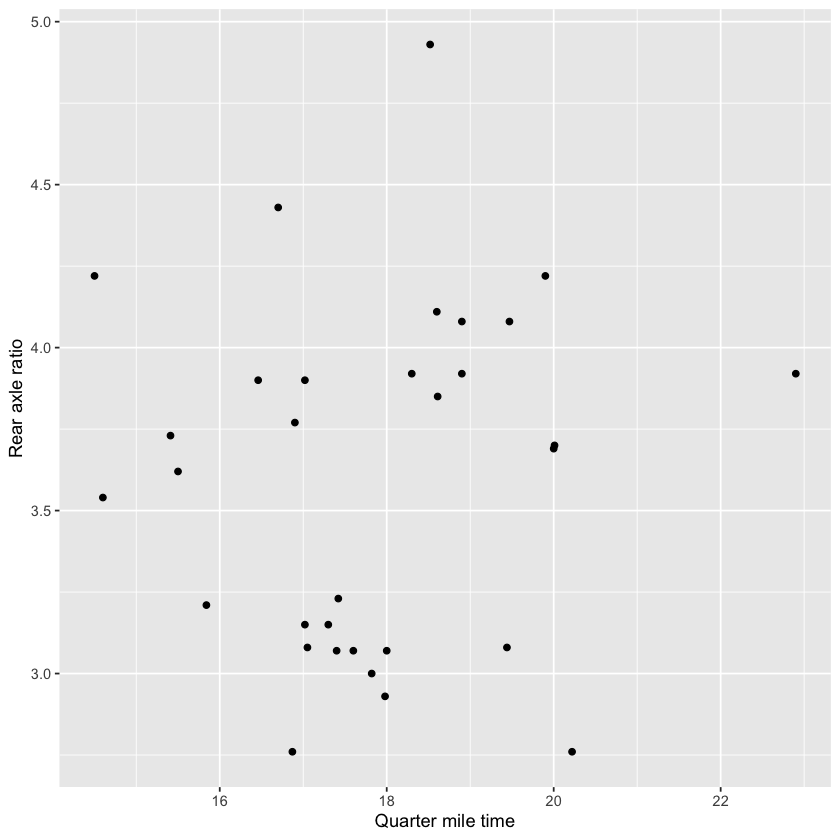

In [33]:
ggplot(mtcars, aes(qsec, drat)) + 
  geom_point() +
  labs(x = "Quarter mile time",
       y = "Rear axle ratio")

If EDA isn't enough, we can answer these questions by fitting a model: a curve that predicts Y given X. Aka, a __regression curve__ or a __machine learning model__. 

(There are more comprehensive models too, such as modelling entire distributions, but that's not what we're doing here)

There are typically two goals of fitting a model:

1. Make predictions.
2. Interpret variable relationships.

## Fitting a model in R

Model fitting methods tend to use a common format in R:

```
method(formula, data, options)
```

They also tend to have a common output: a special _list_. 

__Method__:

A function such as:

- Linear Regression: `lm`
- Generalized Linear Regression: `glm`
- Local regression: `loess`
- Quantile regression: `quantreg::rq`
- ...

__Formula__:

In R, takes the form `y ~ x1 + x2 + ... + xp` (use column names in your data frame).

__Data__: The data frame.

__Options__: Specific to the method.

## Question 3

#### Overview:
1. Fit a linear regression model to life expectancy ("Y") from year ("X") by filling in the formula. Notice what appears as the output.
2. Use the `unclass` function to uncover the object's true nature: a list.

### Question 3.1
First, create a subset of the `gapminder` dataset containing only the country of `France`. Store your answer in `answer3.1`.

```
(answer3.1 <- gapminder %>%
   FILL_THIS_IN(FILL_THIS_IN == FILL_THIS_IN))
```   

In [34]:
### BEGIN SOLUTION
(answer3.1 <- gapminder %>%
   filter(country == "France"))
### END SOLUTION

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
France,Europe,1952,67.410,42459667,7029.809
France,Europe,1957,68.930,44310863,8662.835
France,Europe,1962,70.510,47124000,10560.486
France,Europe,1967,71.550,49569000,12999.918
France,Europe,1972,72.380,51732000,16107.192
France,Europe,1977,73.830,53165019,18292.635
France,Europe,1982,74.890,54433565,20293.897
France,Europe,1987,76.340,55630100,22066.442
France,Europe,1992,77.460,57374179,24703.796


In [35]:
test_that("Question 3.1", {expect_equal(digest(unclass(answer3.1)), "a6125bcbb25047b7a8c932acbb1f2250")})
print("Success!")

[1] "Success!"


### Question 3.2

> Fit a linear regression model to life expectancy ("Y") from year ("X") by filling in the formula

Now, using the `lm()` function we will create the linear model. Store your answer in `answer3.2`.

```
(answer3.2 <- FILL_THIS_IN(FILL_THIS_IN ~ FILL_THIS_IN, answer3.1)
```

In [36]:
### BEGIN SOLUTION
(answer3.2 <- lm(lifeExp ~ year, answer3.1))
### END SOLUTION


Call:
lm(formula = lifeExp ~ year, data = answer3.1)

Coefficients:
(Intercept)         year  
  -397.7646       0.2385  


In [37]:
test_that("Question 3.2", {
    expect_known_hash(round(coef(answer3.2), 4), "e7375b4c2683882feb9d7215f6929f69")
    expect_known_hash(answer3.2$terms, "9c71cfd9974bfbc8e160b1a31936d137")
})
print("Success!")

[1] "Success!"


Does that mean that the life expectency at "year 0" was equal to -397.7646?!

### Question 3.3
We are interested in the modeling results around the modeling period which starts at year 1952. To get a meaniningful "interpretable" intercept we can use the `I()` function.

Use `I()` to make the intercept so that the "beginning" of our dataset (1952) corresponds to '0' in the model. This makes all the years in the data set relative to the first year, 1952.

Store your answer in `answer3.3`.

```
(answer3.3 <- FILL_THIS_IN(FILL_THIS_IN ~ I(FILL_THIS_IN-1952), answer3.1))
```

In [38]:
### BEGIN SOLUTION
(answer3.3 <- lm(lifeExp ~ I(year-1952), answer3.1))
### END SOLUTION


Call:
lm(formula = lifeExp ~ I(year - 1952), data = answer3.1)

Coefficients:
   (Intercept)  I(year - 1952)  
       67.7901          0.2385  


In [39]:
test_that("Question 3.3", {
    expect_known_hash(round(coef(answer3.3), 4), "6a83f591b39b440f2a699dbee2c23468")
    expect_known_hash(answer3.3$terms, "f7d8f19ef010f5932ba9b321f3f88282")
})
print("Success!")

[1] "Success!"


### Question 3.4
Use the `unclass()` function to take a look at how the `lm()` object actually looks like. Store your answer in `answer3.4`.

```
(answer3.4 <- FILL_THIS_IN(answer3.3))
```

In [40]:
### BEGIN SOLUTION
(answer3.4 <- unclass(answer3.3))
### END SOLUTION

$coefficients
   (Intercept) I(year - 1952) 
    67.7901282      0.2385014 

$residuals
          1           2           3           4           5           6 
-0.38012821 -0.05263520  0.33485781  0.18235082 -0.18015618  0.07733683 
          7           8           9          10          11          12 
-0.05517016  0.20232284  0.12981585  0.11730886 -0.12519814 -0.25070513 

$effects
   (Intercept) I(year - 1952)                                              
 -257.55220231    14.26030956     0.41516662     0.26479522    -0.09557618 
                                                                           
    0.16405242     0.03368103     0.29330963     0.22293823     0.21256684 
                              
   -0.02780456    -0.15117596 

$rank
[1] 2

$fitted.values
       1        2        3        4        5        6        7        8 
67.79013 68.98264 70.17514 71.36765 72.56016 73.75266 74.94517 76.13768 
       9       10       11       12 
77.33018 78.52269 79.71520 80.90

In [41]:
test_that("Question 3.4", {
    expect_known_hash(round(answer3.4$coefficients, 4), "6a83f591b39b440f2a699dbee2c23468")
    expect_known_hash(class(answer3.4), "086ebc4c59c08c43e75bae74f1e16897")
    expect_known_hash(answer3.4$terms, "f7d8f19ef010f5932ba9b321f3f88282")
    
})
print("Success!")

[1] "Success!"


However, to make things more complicated, some info is stored in _another_ list after applying the `summary` function. Run the code cell below.

In [42]:
summary(answer3.3)


Call:
lm(formula = lifeExp ~ I(year - 1952), data = answer3.1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38013 -0.13894  0.01235  0.14295  0.33486 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    67.79013    0.11949  567.33  < 2e-16 ***
I(year - 1952)  0.23850    0.00368   64.81 1.86e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.22 on 10 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9974 
F-statistic:  4200 on 1 and 10 DF,  p-value: 1.863e-14


We can use the `predict()` function to make predictions from the model (default is to use fitting/training data). Here are the predictions. Run the code cell below. Use `predict()` to predict for years that are within our year range but do not have explicit data points.

In [43]:
(gapminder_France <- data.frame(year = seq(2000, 2005)))
predict(answer3.3, newdata = gapminder_France) %>%
  head()

year
<int>
2000
2001
2002
2003
2004
2005


1       2       3       4       5       6 
79.2382 79.4767 79.7152 79.9537 80.1922 80.4307

Or we can predict on a new dataset! Use `predict()` to predict for years that are beyond the range of our dataset, that is, extrapolate data using the model. Run the code cell below.

1        2 
317.7396 318.9321

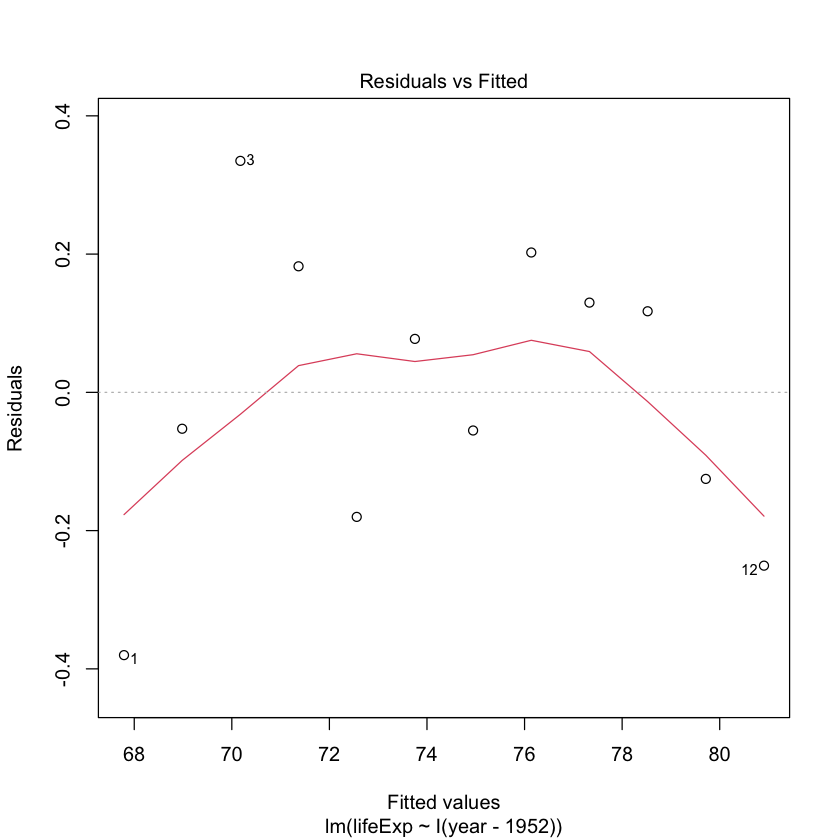

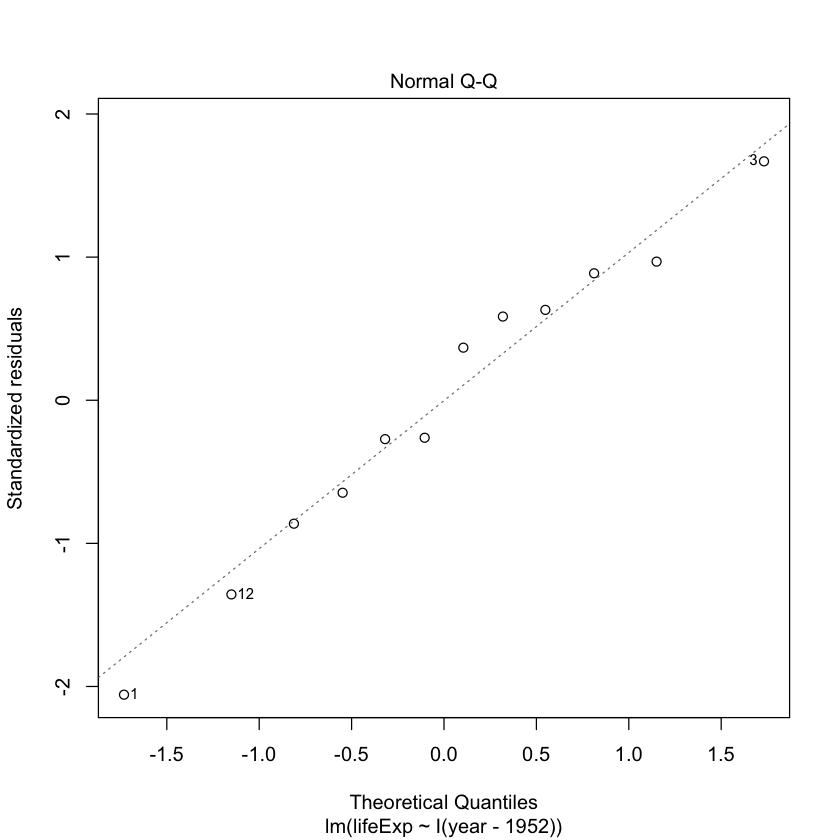

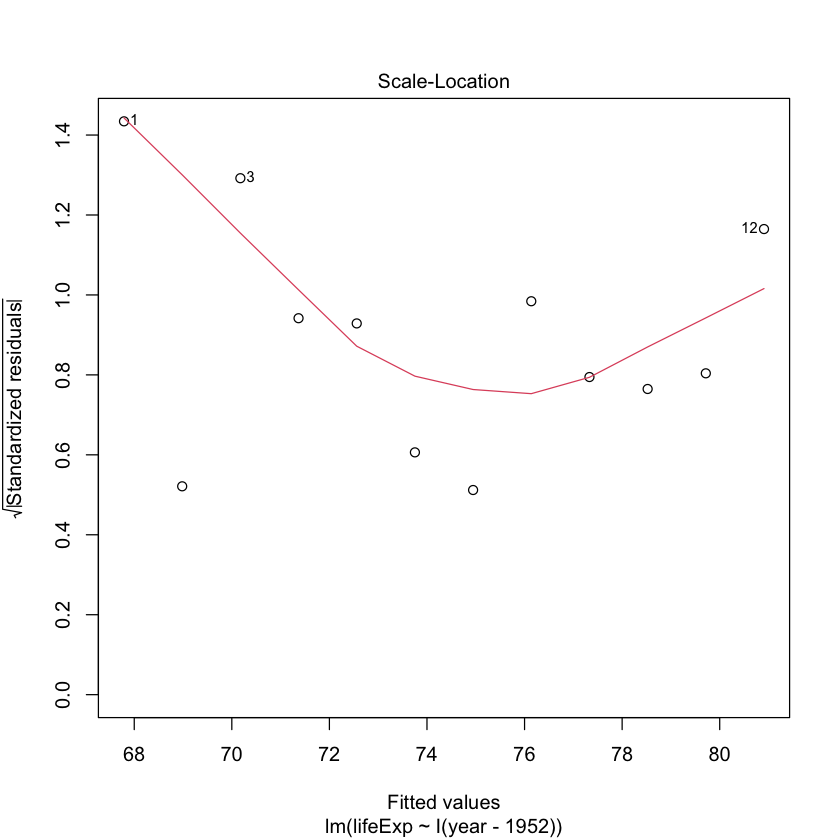

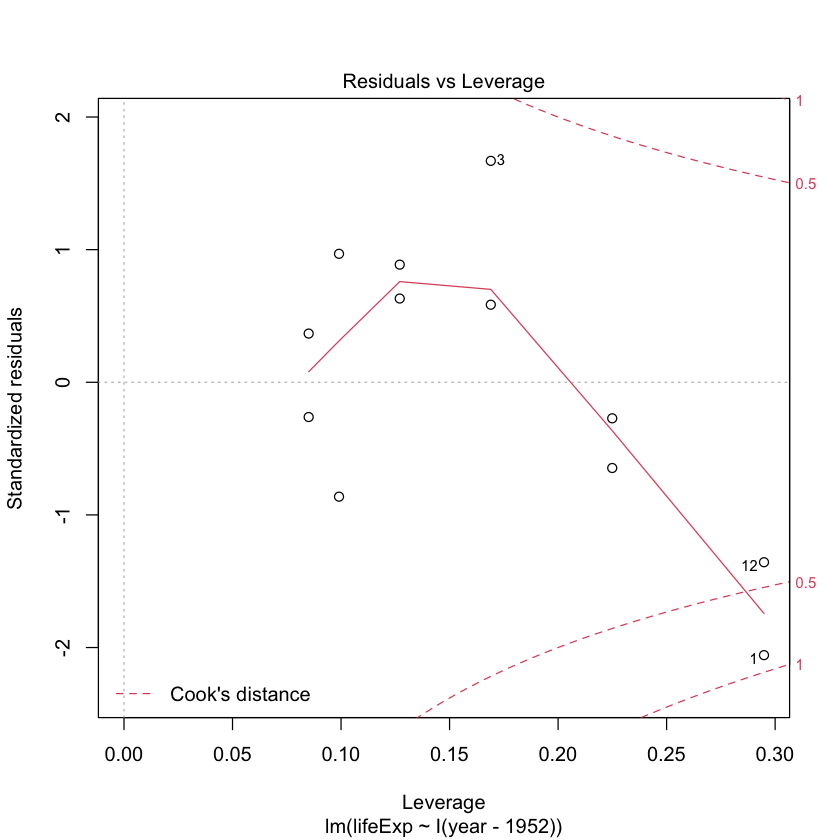

In [44]:
years1 = data.frame(year = c(3000, 3005))
predict(answer3.3,years1)
plot(answer3.3)

We can plot models (with one predictor/ X variable) using `ggplot2` through the `geom_smooth()` layer. Specifying `method="lm"` gives us the linear regression fit (but only visually!). Run the code cell below.

`geom_smooth()` using formula 'y ~ x'



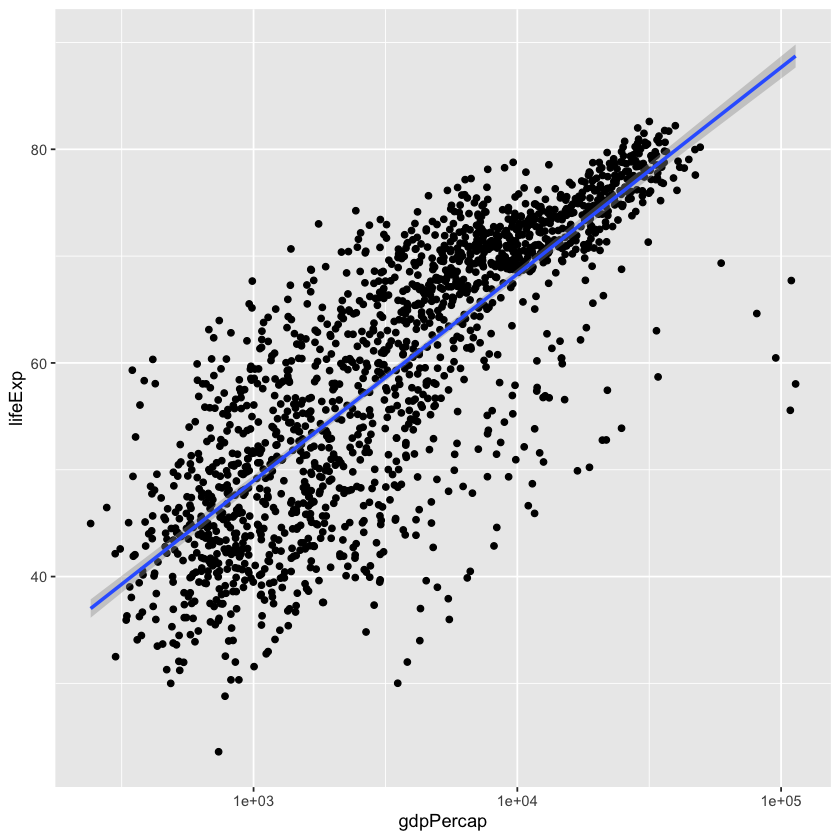

In [45]:
ggplot(gapminder, aes(gdpPercap, lifeExp)) +
    geom_point() +
    geom_smooth(method="lm") +
    scale_x_log10()

Let's consider another country "Zimbabwe", which has a unique behavior in the `lifeExp` and `year` relationship. Run the code cell below.

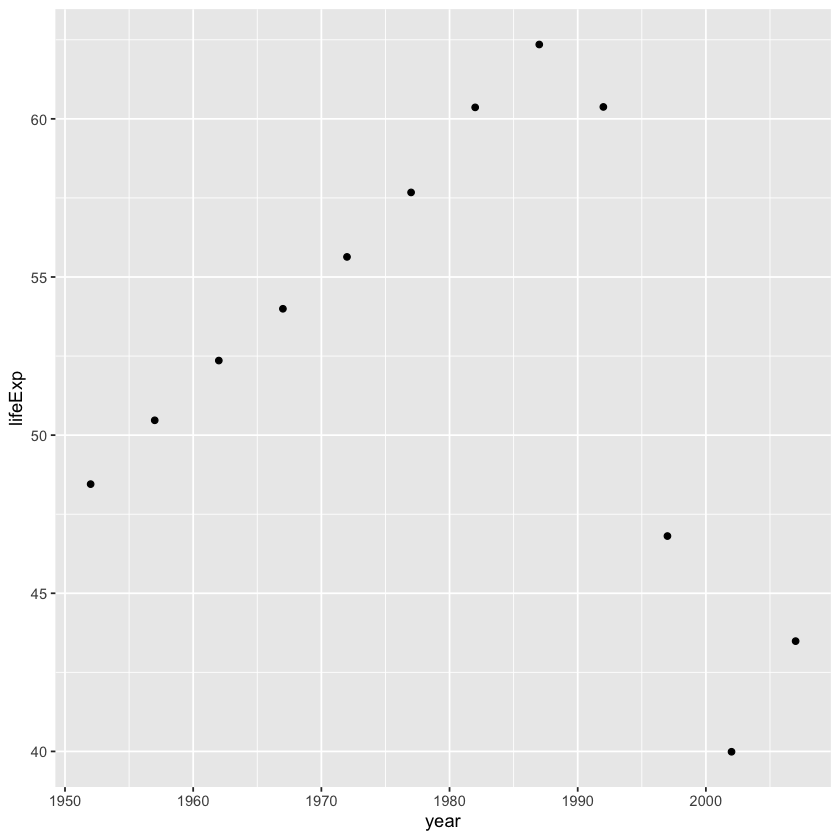

In [46]:
gapminder_Zimbabwe <- gapminder %>%
  filter(country == "Zimbabwe")

gapminder_Zimbabwe %>% 
  ggplot(aes(year, lifeExp)) +
  geom_point()

Let's try fitting a linear model to this relationship. `se` option allows us to show or hide the confidence interval. Run the code cell below.

`geom_smooth()` using formula 'y ~ x'



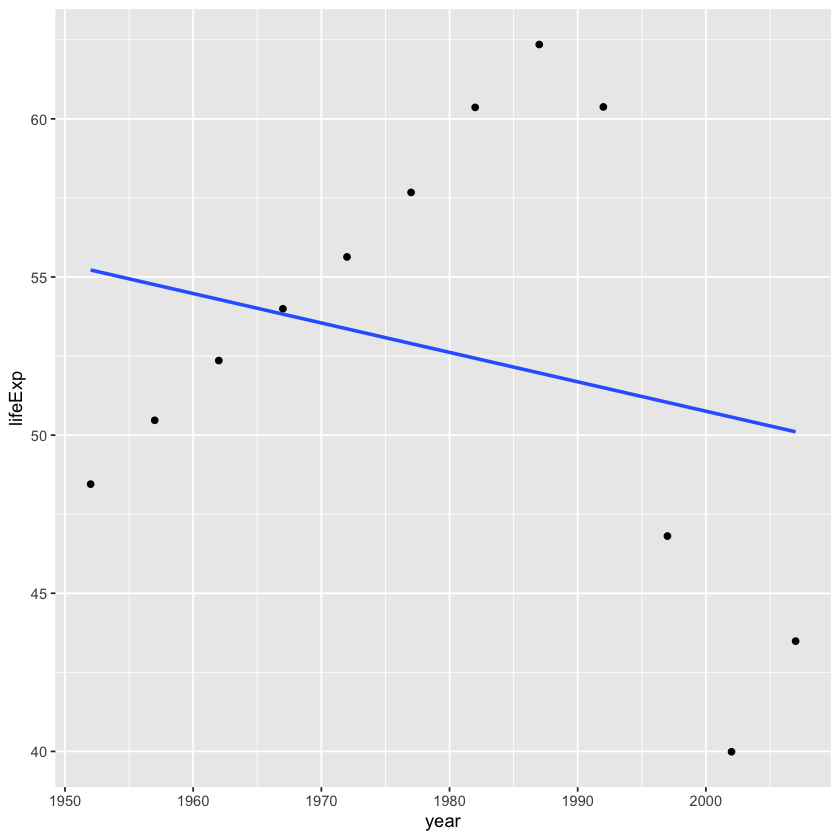

In [47]:
ggplot(gapminder_Zimbabwe, aes(year,lifeExp)) +
  geom_point() +
  geom_smooth(method = "lm", se = F)

Now we will try to fit a second degree polynomial (`degree = 2`) and see what would that look like. Run the code cell below.

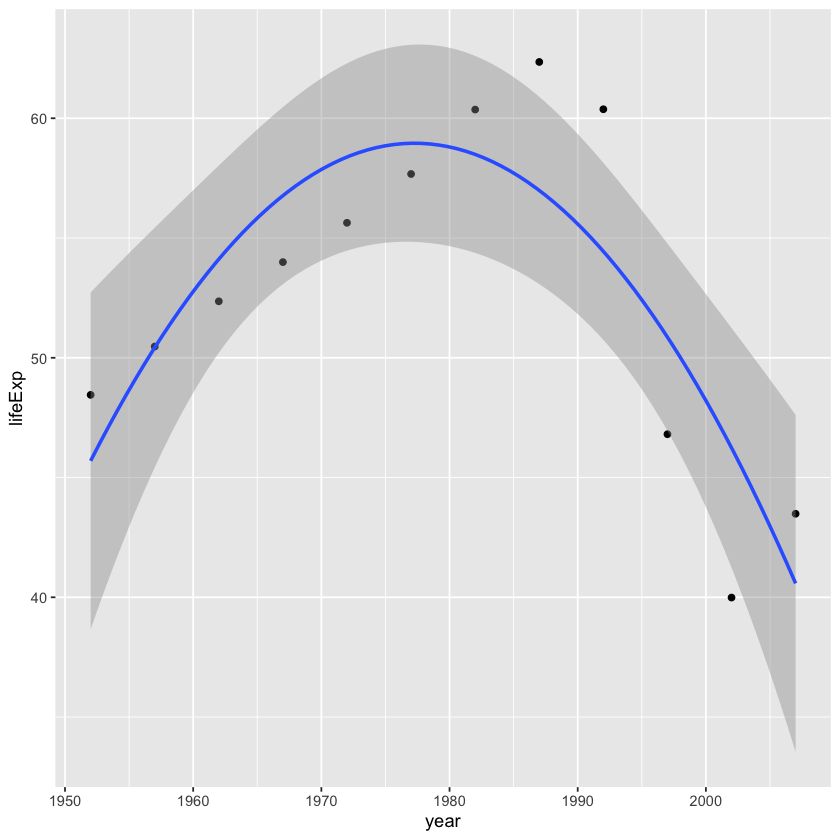

In [48]:
ggplot(gapminder_Zimbabwe, aes(year, lifeExp)) + 
  geom_point()+
  geom_smooth(method = "lm", formula = y ~ poly(I(x - 1952), degree = 2))

## Broom
Let's make it easier to extract info, using the `broom` package. There are three crown functions in this package, all of which input a fitted model, and outputs a tidy data frame.

1. `tidy`: extract statistical summaries about each component of the model.
    - Useful for _interpretation_ task.
2. `augment`: add columns to the original data frame, giving information corresponding to each row.
    - Useful for _prediction_ task.
3. `glance`: extract statistical summaries about the model as a whole (1-row tibble).
    - Useful for checking goodness of fit.
    
## Question 4
Overview:
 - Apply all three functions to our fitted model, `answer3.3`
 
### Question 4.1
Apply `tidy()` to `answer3.3`. Store your answer in `answer4.1`.

```
answer4.1 <- FILL_THIS_IN(answer3.3)
```

In [49]:
### BEGIN SOLUTION
answer4.1 <- tidy(answer3.3)
### END SOLUTION

In [50]:
test_that("Question 4.1", {
    expect_known_hash(dimnames(answer4.1), "b7e5db66048ee1c33cb090078dc59103")
    expect_known_hash(answer4.1[[1]], "6736fedebcaa557ef7a78f8db206000f")
    expect_known_hash(round(answer4.1[[3]], 4), "004727aa166a650b3f55c2c11f6be257")
})
print("Success!")

[1] "Success!"


Run the code cell below to see the `tidy` function result!

In [51]:
answer4.1

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),67.7901282,0.119490058,567.32861,7.123475e-24
I(year - 1952),0.2385014,0.003680248,64.80579,1.863068e-14


### Question 4.2
Apply `augment()` to `answer3.3`. Store your answer in `answer4.2`.

```
answer4.2 <- FILL_THIS_IN(answer3.3)
```

In [52]:
### BEGIN SOLUTION
answer4.2 <- augment(answer3.3)
### END SOLUTION

In [53]:
test_that("Question 4.2", {
    expect_known_hash(dimnames(answer4.2), "9426de2f1eec093be63fa81dae3c2089")
    expect_known_hash(round(answer4.2[[3]], 4), "3a2e6323312173544d30c4dc75d5b604")
    expect_known_hash(round(answer4.2[[4]], 4), "b2796c0f920703cb5066fcda716be2e7")
})
print("Success!")

[1] "Success!"


Run the code cell below to see the `augment` function result:

In [54]:
answer4.2

lifeExp,I(year - 1952),.fitted,.std.resid,.hat,.sigma,.cooksd
<dbl>,<I<dbl>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67.410,0,67.79013,-2.0572208,0.29487179,0.1761573,0.884905601
68.930,5,68.98264,-0.2717027,0.22494172,0.2310920,0.010712566
70.510,10,70.17514,1.6693375,0.16899767,0.1969978,0.283358854
71.550,15,71.36765,0.8869421,0.12703963,0.2226395,0.057240744
72.380,20,72.56016,-0.8625572,0.09906760,0.2231544,0.040905832
73.830,25,73.75266,0.3674346,0.08508159,0.2303787,0.006277450
74.890,30,74.94517,-0.2621187,0.08508159,0.2311516,0.003194619
76.340,35,76.13768,0.9686874,0.09906760,0.2207992,0.051591334
77.460,40,77.33018,0.6314156,0.12703963,0.2272790,0.029009837


### Question 4.3
Apply `glance()` to `answer3.3`. Store your answer in `answer4.3`.

```
answer4.3 <- FILL_THIS_IN(answer3.3)
```

In [55]:
### BEGIN SOLUTION
answer4.3 <- glance(answer3.3)
### END SOLUTION

In [56]:
test_that("Question 4.3", {
    expect_known_hash(dimnames(answer4.3), "78044903eb403fb9220d796ac127297c")
    expect_known_hash(round(answer4.3[[2]], 4), "a3ec6ee89f16b0783571e8f9e26c9ef5")
    expect_known_hash(round(answer4.3[[4]], 4), "f95d29661fc511c6a038ae4e06b9ea02")
})
print("Success!")

[1] "Success!"


Run the code cell below to see the `glance` function result:

In [59]:
answer4.3

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9976246,0.997387,0.2200468,4199.79,1.863068e-14,1,2.233645,1.532711,2.987431,0.4842062,10,12
